In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image=cv2.imread('sudoku.tif')
image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
opti_image=cv2.equalizeHist(image)

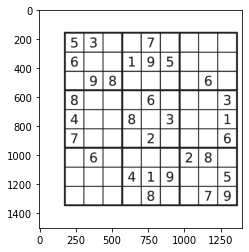

In [4]:
plt.imshow(opti_image,cmap='gray')


In [5]:
print(opti_image.shape)


(1500, 1400)


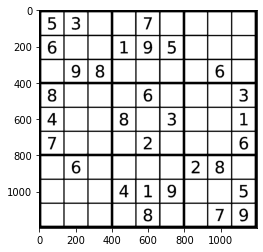

In [6]:

(thresh,img_binary)=cv2.threshold(opti_image, 170, 255, cv2.THRESH_BINARY)

column = []
x_start = 0
x_end = 0
obj = False
for n in range(img_binary.shape[1]):
    if not obj:
        if any(img_binary[:, n] != 255):
            x_start = n
            obj = True
    else:
        if all(img_binary[:, n] == 255):
            x_end = n
            break
y_start = 0
y_end = 0
obj = False
for n in range(img_binary.shape[0]):
    if not obj:
        if any(img_binary[n, :] != 255):
            y_start = n
            obj = True
    else:
        if all(img_binary[n, :] == 255):
            y_end = n
            break
# img_out = np.zeros((y_end - y_start, x_end - x_start), dtype='uint8')
img_out = img_binary[y_start:y_end, x_start:x_end]
plt.imshow(img_out, cmap='gray')
# for m in range(0, len(column), 2):
#     cv2.imwrite(f"result{m}.jpg",opti_image[:, column[m]:column[m+1]])

# plt.imshow(img_binary,cmap='gray')


In [7]:
print(img_out.shape)

(1200, 1200)


In [8]:
y_start = 0
y_end = 0

obj = 0
img = []
for i in range(img_out.shape[0]):
    if obj == 0:
        if all(img_out[i,:] == 0):
            obj = 1
    elif obj == 1:
        if any(img_out[i, :] == 255):
            y_start = i
            obj = 2
    else:
        if all(img_out[i,:] == 0):
            y_end = i
            obj = 0 
            img.append(img_out[y_start:y_end, :])

In [9]:
print(np.array(img[0]).shape[0])

124


In [24]:
obj = 0
flag = False
cells = []
for indx, cell in enumerate(img):
    for i in range(cell.shape[1]):
        if obj==0:
            if all(cell[:,i] == 0):
                obj=1
        elif obj == 1:
            if any(cell[:,i] == 255):
                x_start=i
                obj=2
        else:
            if all(cell[:, i] == 0):
                x_end = i
                obj = 0
                if np.sum(cell[:, x_start:x_end]) < (np.size(cell[:, x_start:x_end])-(2*134))*255:
                    cells.append(cell[:, x_start:x_end])
len(cells)

30

In [17]:
x = np.array([[1, 2], [3, 4]])
# np.sum(x)
np.size(x)
# print(type(img[0]))

4

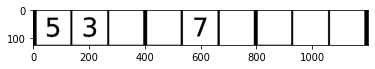

In [11]:
plt.imshow(img[0], cmap='gray')
# print(np.max(img[][0]))

In [20]:
len(cells)

59

In [25]:
import shutil
import os
shutil.rmtree('output', ignore_errors=True)
os.makedirs('output')
for i in range(len(cells)):
#     plt.imshow(cells[i],cmap='gray')
    cv2.imwrite(f"output/result{i}.jpg",cells[i])